# Data Science Lab 1 - Iris dataset

The goal is to determine wether or not the various classes of Iris are separated.

In [1]:
import pandas as pd

iris = pd.read_csv("../data/iris_cleaned.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,virginica
142,6.3,2.5,5.0,1.9,virginica
143,6.5,3.0,5.2,2.0,virginica
144,6.2,3.4,5.4,2.3,virginica


## Method 2 - visualisation

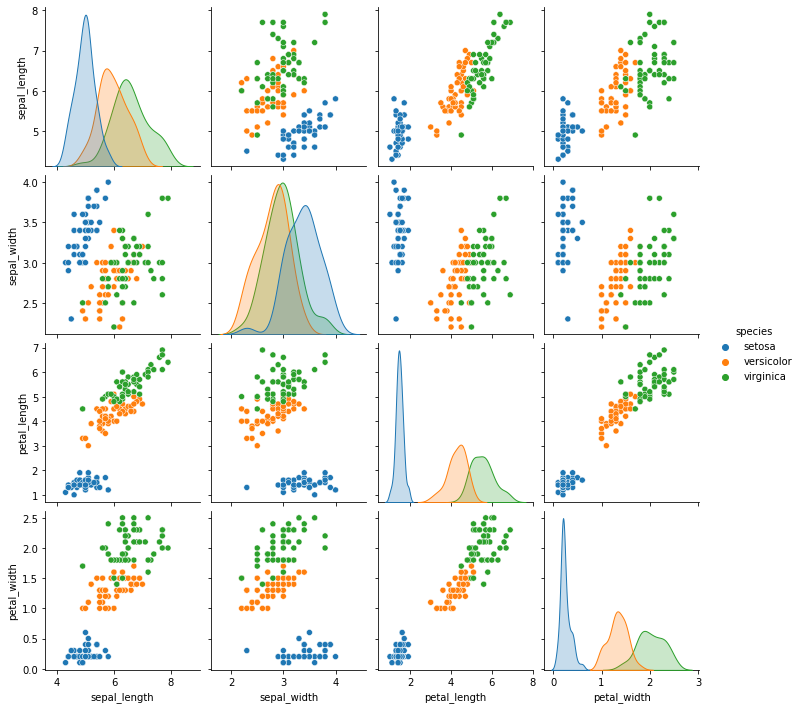

In [3]:
from seaborn import pairplot

pairplot(iris, hue='species')

We can see that in each case we distinguish (more or less) clearly the three types of flowers. We can therefore conclude that each variable carries information (typically statistical variance) about the type of flower independently.

If we could choose only one variable, it might be the width of the petals, but the results would be far from perfect. In fact, *virginica* and *versicolor* slightly overlap so are not linearly separable. Thus, let's transform variables and apply PCA to solve this.

### Scikit-Learn PCA

#### Normalise features
Bring variables to the same scale.

In [2]:
from sklearn.preprocessing import StandardScaler

x = iris.drop('species', axis=1)
y = iris['species']

x_scaled = StandardScaler().fit_transform(x)

#### Apply PCA

In [19]:
from sklearn.decomposition import PCA

n_comps = 4

pca = PCA(n_components=n_comps)#, svd_solver="full", whiten=True)
iris_trans = pca.fit_transform(x_scaled)

Text(0.5, 1.0, 'Individual explained variance')

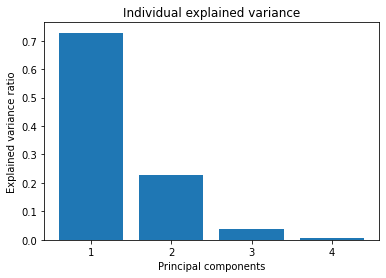

In [20]:
import matplotlib.pyplot as plt

plt.bar([str(i+1) for i in range(4)], pca.explained_variance_ratio_, align='center')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.title("Individual explained variance")

We see that the first principal component seems to contain a very large part of the variance information, so we could almost neglect all the others without losing too much information.

Explained variance for 2 components:

In [21]:
sum(pca.explained_variance_ratio_[:2])

0.9568557195230519

#### Scatter plots

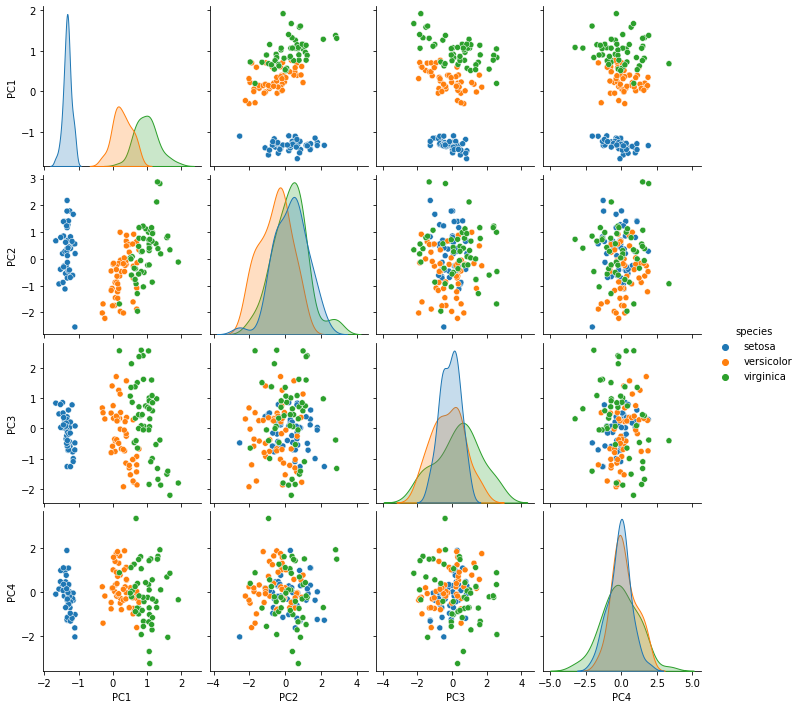

In [22]:
from seaborn import pairplot

iris_trans = pd.DataFrame(iris_trans, columns=[f"PC{i+1}" for i in range(n_components)])
iris_trans['species'] = y

pairplot(iris_trans, hue='species')

Let's try to keep only the two first components.

In [8]:
pca = PCA(n_components=4)
principal_cpts = pca.fit_transform(x_scaled).transpose()

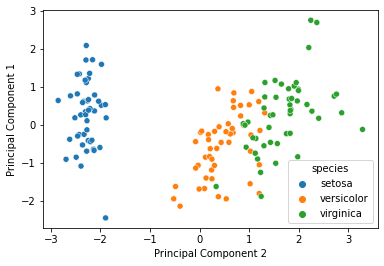

In [9]:
from seaborn import scatterplot

scatterplot(x=principal_cpts[0], y=principal_cpts[1], hue=iris['species'])
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()